In [58]:
import pickle

In [59]:
import numpy as np

In [60]:
def expit(x):
    """Compute softmax values for each sets of scores in x."""
#     e_x = np.exp(x - np.max(x))
    return 1 / (1 + np.exp(-x))

In [61]:
# with open('Data_Generation//LSTM_Heavy_Dropout//heavy_dropout_first_lstm.pkl', 'rb') as f:
#     first_lstm = pickle.load(f)  


In [62]:
with open('Data_Generation//LSTM_Heavy_Dropout//heavy_dropout_first_lstm.pkl', 'rb') as f:
    lstm_heavy_dropout = pickle.load(f)  

In [63]:
cur_idx = 2

In [64]:
heavy_gt = expit(lstm_heavy_dropout[cur_idx][2])

In [65]:
heavy_gt

array([[0.91270584],
       [0.29808572],
       [0.18613595],
       [0.8988367 ],
       [0.17939486],
       [0.23768046],
       [0.12948993],
       [0.40275997]], dtype=float32)

In [66]:
# enkf_heavy[0][-1].mean(0)

In [67]:
# lstm_heavy[0][-1].mean(1)

In [68]:
# lstm_low[0][-1].mean(1)

In [69]:
with open('Data_Generation//LSTM_Low_Dropout//low_dropout_first_lstm.pkl', 'rb') as f:
    lstm_low_dropout = pickle.load(f)  

In [70]:
low_gt = expit(lstm_low_dropout[cur_idx][2])

In [71]:
low_gt

array([[0.8831825 ],
       [0.43187666],
       [0.30719405],
       [0.8349711 ],
       [0.28390482],
       [0.30688313],
       [0.2120446 ],
       [0.4596558 ]], dtype=float32)

In [72]:
# with open(r'EnKF_Real_World_doc2vec_lstm_real_world_heavy_dropout.pkl', "rb") as f:
#     enkf_heavy = pickle.load(f)

In [73]:
with open(r'Real_World_LSTM_Models_Heavy_Dropout/first_lstm_just_lstm_real_world_heavy_dropout.pkl', "rb") as f:
    lstm_heavy = pickle.load(f)

In [74]:
with open(r'Real_World_LSTM_Models_Low_Dropout/first_lstm_just_lstm_real_world_low_dropout.pkl', "rb") as f:
    lstm_low = pickle.load(f)

In [75]:
import pandas as pd

In [76]:
# catch_preds_enkf_heavy = []
# for i in range(0, enkf_heavy[cur_idx][-1].shape[1]):
#     enkf_preds = enkf_heavy[cur_idx][-1][:,i,:]
#     enkf_preds_df = pd.DataFrame(enkf_preds)
#     enkf_preds_df["Test_Sample_ID"] = i 
#     enkf_preds_df.columns = ["EnKF_Preds", "Test_Sample_ID"]
#     catch_preds_enkf_heavy.append(enkf_preds_df)

In [77]:
# catch_preds_enkf_heavy_df = pd.concat(catch_preds_enkf_heavy)

In [78]:
catch_preds_mcd_heavy = []
for i in range(0, lstm_heavy[cur_idx][-1].shape[0]):
    enkf_preds = lstm_heavy[cur_idx][-1][i,:]
    enkf_preds_df = pd.DataFrame(enkf_preds)
    enkf_preds_df["Test_Sample_ID"] = i 
    enkf_preds_df.columns = ["EnKF_Preds", "Test_Sample_ID"]
    catch_preds_mcd_heavy.append(enkf_preds_df)

In [79]:
catch_preds_mcd_heavy_df = pd.concat(catch_preds_mcd_heavy)

In [80]:
catch_preds_mcd_low = []
for i in range(0, lstm_low[cur_idx][-1].shape[0]):
    enkf_preds = lstm_low[cur_idx][-1][i,:]
    enkf_preds_df = pd.DataFrame(enkf_preds)
    enkf_preds_df["Test_Sample_ID"] = i 
    enkf_preds_df.columns = ["EnKF_Preds", "Test_Sample_ID"]
    catch_preds_mcd_low.append(enkf_preds_df)

In [81]:
catch_preds_mcd_low_df = pd.concat(catch_preds_mcd_low)

In [82]:
ids = np.sort([i for i in range(0, heavy_gt.shape[0]) if heavy_gt[i] < 0.5])
ids_more = np.sort([i for i in range(0, heavy_gt.shape[0]) if heavy_gt[i] > 0.5])

In [83]:
# catch_preds_enkf_heavy_df_filtered = catch_preds_enkf_heavy_df[catch_preds_enkf_heavy_df["Test_Sample_ID"].isin(ids_more)]

In [84]:
catch_preds_lstm_heavy_df_filtered = catch_preds_mcd_heavy_df[catch_preds_mcd_heavy_df["Test_Sample_ID"].isin(ids_more)]

In [85]:
catch_preds_lstm_low_df_filtered = catch_preds_mcd_low_df[catch_preds_mcd_low_df["Test_Sample_ID"].isin(ids_more)]

In [86]:
filtered_true_enkf_heavy_df = heavy_gt[ids_more,:]

In [87]:
filtered_true_enkf_low_df = low_gt[ids_more,:]

In [88]:
import seaborn as sns

In [89]:
import matplotlib.pyplot as plt

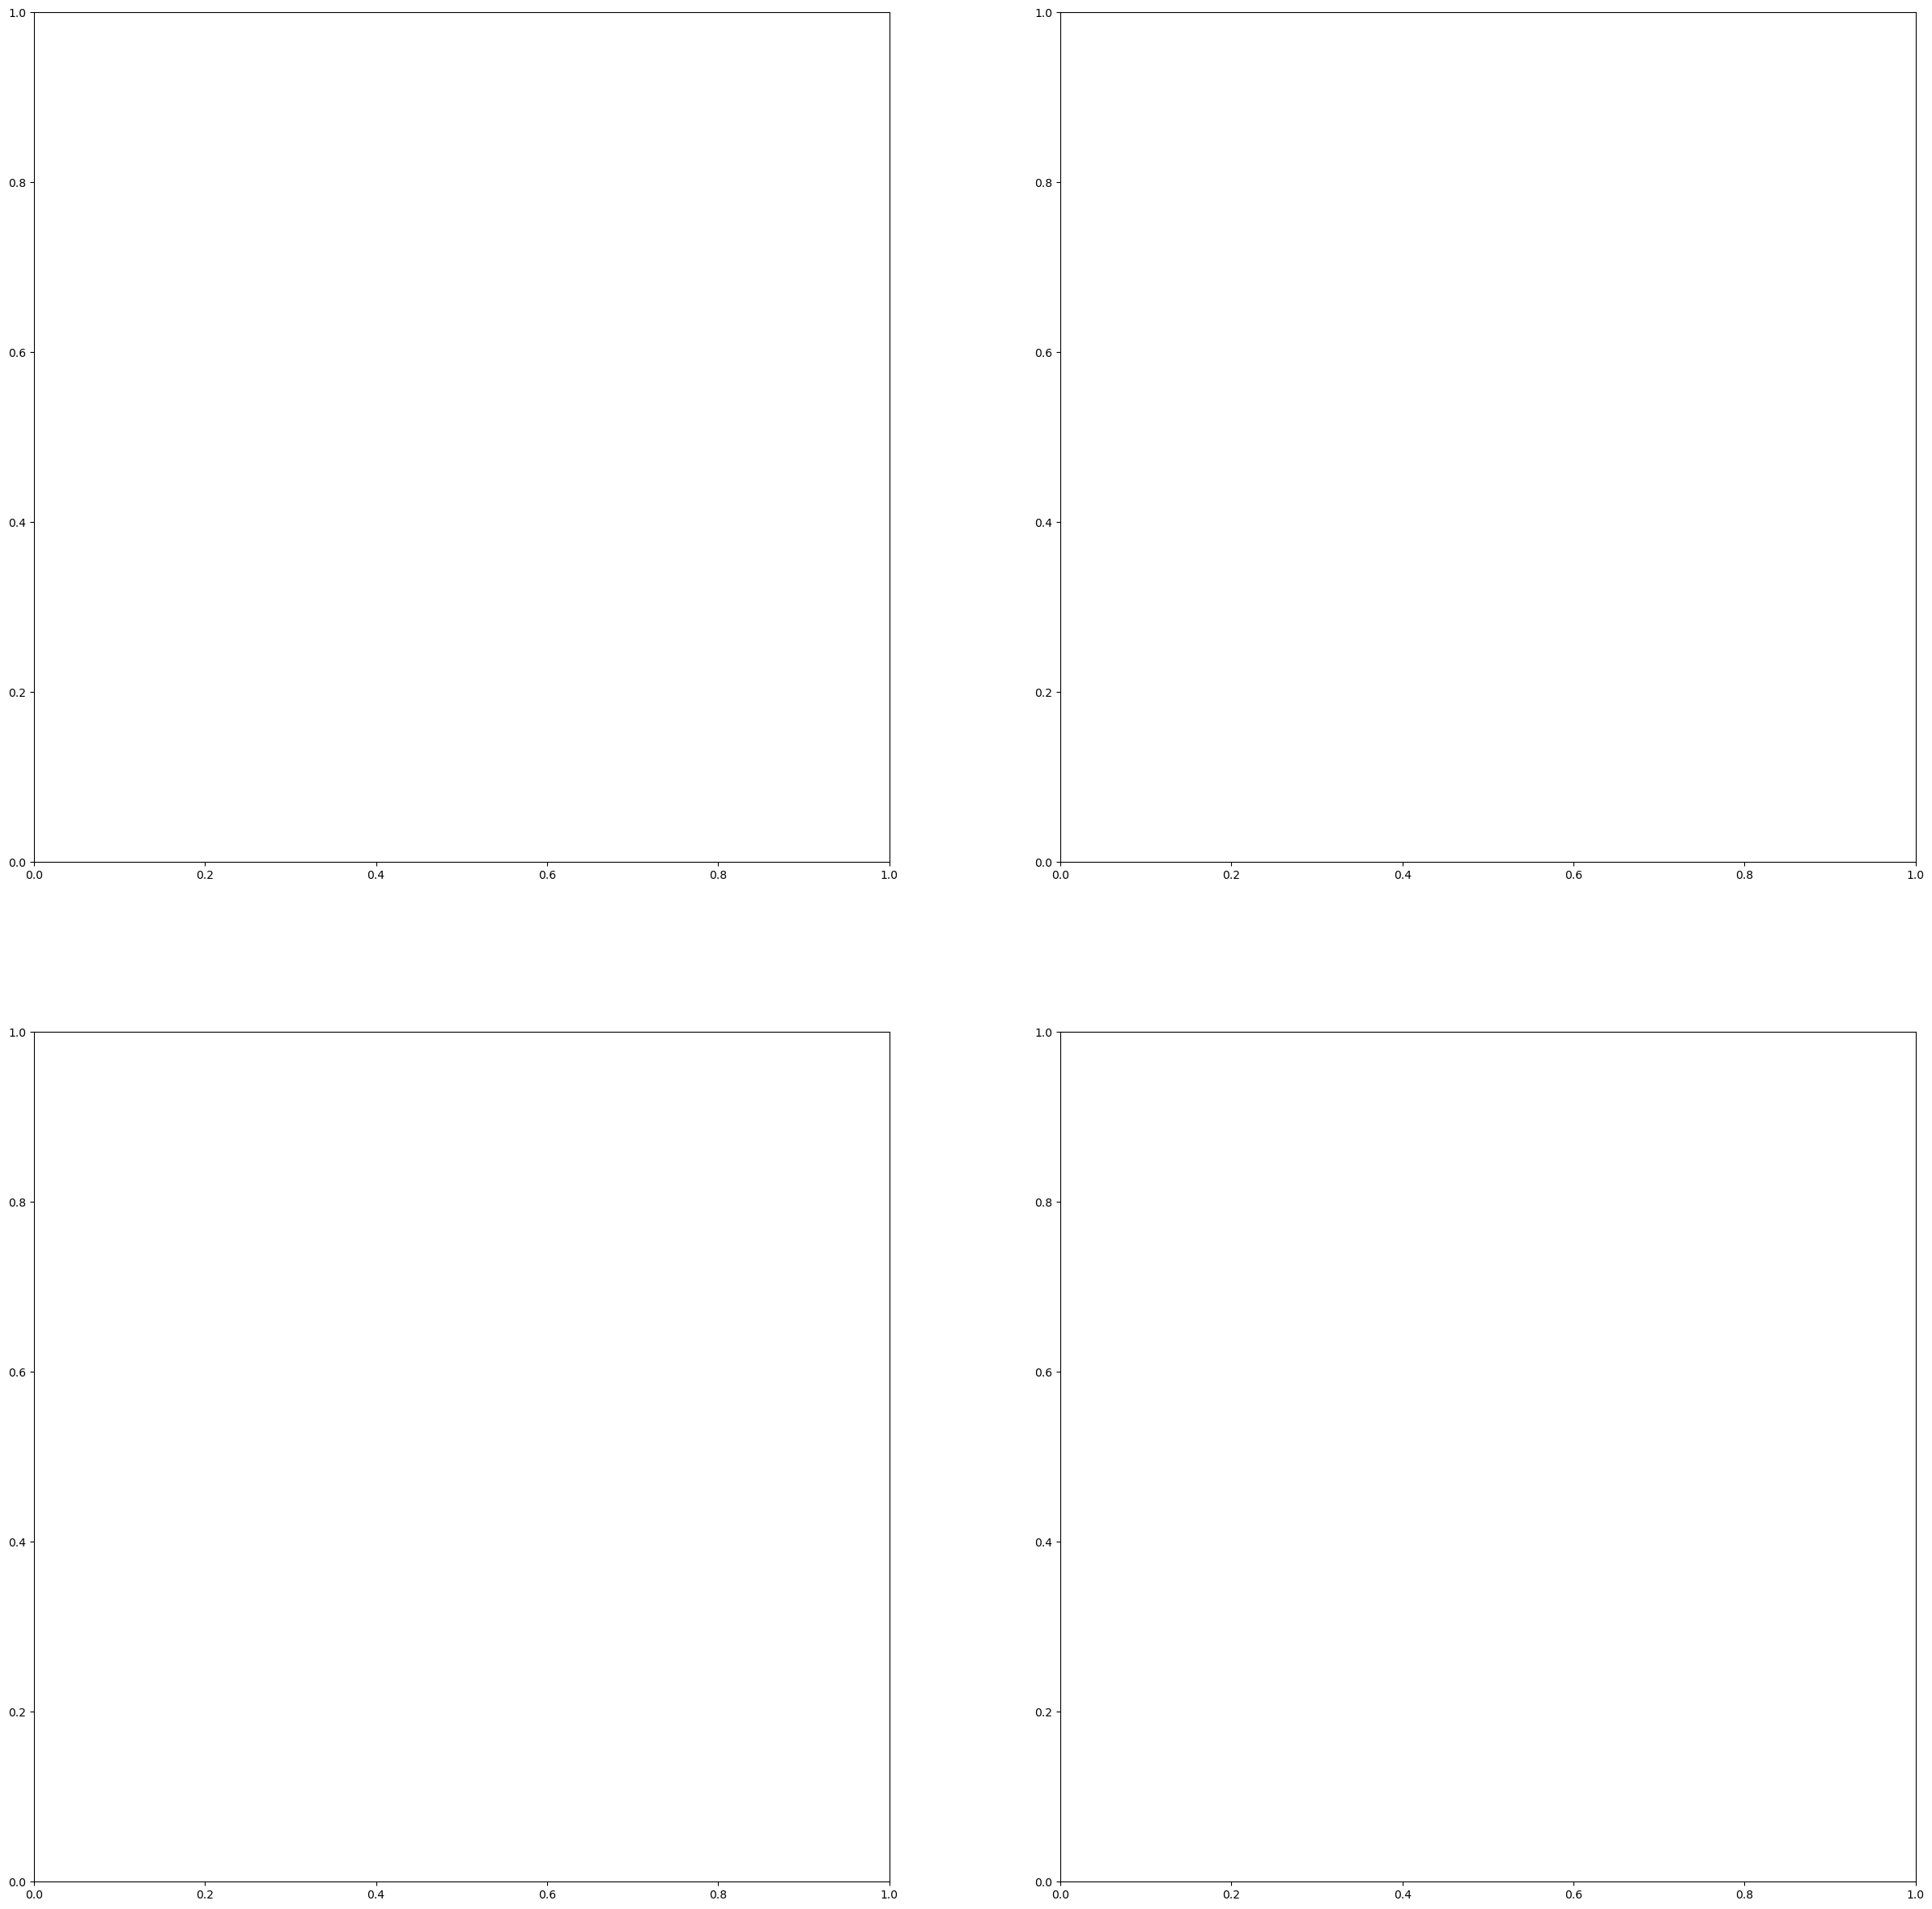

In [90]:
f, axes = plt.subplots(2, 2, figsize = (30, 30))
axes = axes.ravel()

In [91]:
# # plt.figure(figsize = (10,10))
# fig1 = sns.boxplot(catch_preds_enkf_heavy_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False)
# plt.scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = 50)
# plt.xlabel("Test Sample ID", fontsize = 15, fontweight = "bold")
# plt.ylabel("EnKF Predictions", fontsize = 15, fontweight = "bold")
# plt.xticks(fontsize = 10, fontweight = "bold")
# plt.yticks(fontsize = 10, fontweight = "bold")
# plt.show()

In [92]:
# fig1 = sns.boxplot(catch_preds_enkf_heavy_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False, ax=axes[0])
# axes[0].scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = 100)
# axes[0].set_xlabel("Test Sample ID", fontsize = 20, fontweight = "bold")
# axes[0].set_ylabel("MEnKF-ANN Predictions", fontsize = 20, fontweight = "bold")
# axes[0].tick_params(labelsize = 15, labelcolor = "black",axis='both')
# texts = [t.get_text()  for t in axes[0].get_xticklabels()]
# axes[0].set_xticklabels(texts,weight = "bold")
# axes[0].set_yticklabels(axes[0].get_yticks().round(2),weight = "bold")
# # axes[0].yticks(fontsize = 10, fontweight = "bold")
# # plt.show()

In [93]:
# # plt.figure(figsize = (10,10))
# fig2 = sns.boxplot(catch_preds_lstm_heavy_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False)
# plt.scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = 50)
# plt.xlabel("Test Sample ID", fontsize = 15, fontweight = "bold")
# plt.ylabel("EnKF Predictions", fontsize = 15, fontweight = "bold")
# plt.xticks(fontsize = 10, fontweight = "bold")
# plt.yticks(fontsize = 10, fontweight = "bold")
# plt.show()

In [94]:
label_size = 35
font_size = 40
scatter_size = 300

In [95]:
fig2 = sns.boxplot(catch_preds_lstm_heavy_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False, ax=axes[0])
axes[0].scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = scatter_size)
axes[0].set_xlabel("Test Sample ID", fontsize = font_size, fontweight = "bold")
axes[0].set_ylabel("LSTM Heavy Dropout Predictions", fontsize = font_size, fontweight = "bold")
axes[0].tick_params(labelsize = label_size, labelcolor = "black",axis='both')
texts = [t.get_text()  for t in axes[0].get_xticklabels()]
axes[0].set_xticklabels(texts,weight = "bold")
axes[0].set_ylim([0.4, 1.0])
axes[0].set_yticklabels(axes[0].get_yticks().round(2),weight = "bold")
# axes[0].yticks(fontsize = 10, fontweight = "bold")
# plt.show()

/tmp/ipykernel_3341536/106906253.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(axes[0].get_yticks().round(2),weight = "bold")


[Text(0, 0.4, '0.4'),
 Text(0, 0.5, '0.5'),
 Text(0, 0.6000000000000001, '0.6'),
 Text(0, 0.7000000000000001, '0.7'),
 Text(0, 0.8, '0.8'),
 Text(0, 0.9, '0.9'),
 Text(0, 1.0, '1.0')]

In [96]:
# # plt.figure(figsize = (10,10))
# fig3 = sns.boxplot(catch_preds_lstm_low_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False)
# plt.scatter(range(0, filtered_true_enkf_low_df.shape[0]), filtered_true_enkf_low_df, c = "black", s = 50)
# plt.xlabel("Test Sample ID", fontsize = 15, fontweight = "bold")
# plt.ylabel("LSTM Heavy Dropout Predictions", fontsize = 15, fontweight = "bold")
# plt.xticks(fontsize = 10, fontweight = "bold")
# plt.yticks(fontsize = 10, fontweight = "bold")
# plt.show()

In [97]:
# axes[2].get_yticks()

In [98]:
# axes[2].get_yticklabels()

In [99]:
# texts = [t.get_text()  for t in axes[2].get_yticklabels()]

In [100]:
fig3 = sns.boxplot(catch_preds_lstm_low_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False, ax=axes[1])
axes[1].scatter(range(0, filtered_true_enkf_low_df.shape[0]), filtered_true_enkf_low_df, c = "black", s = scatter_size)
axes[1].set_xlabel("Test Sample ID", fontsize = font_size, fontweight = "bold")
axes[1].set_ylabel("LSTM Low Dropout Predictions", fontsize = font_size, fontweight = "bold")
axes[1].tick_params(labelsize = label_size, labelcolor = "black",axis='both')
texts = [t.get_text()  for t in axes[1].get_xticklabels()]
axes[1].set_xticklabels(texts,weight = "bold")
axes[1].set_ylim([0.4, 1.0])
axes[1].set_yticklabels(axes[1].get_yticks().round(2),weight = "bold")
# axes[0].yticks(fontsize = 10, fontweight = "bold")
# plt.show()

/tmp/ipykernel_3341536/3824253673.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(axes[1].get_yticks().round(2),weight = "bold")


[Text(0, 0.4, '0.4'),
 Text(0, 0.5, '0.5'),
 Text(0, 0.6000000000000001, '0.6'),
 Text(0, 0.7000000000000001, '0.7'),
 Text(0, 0.8, '0.8'),
 Text(0, 0.9, '0.9'),
 Text(0, 1.0, '1.0')]

In [101]:
# f

In [102]:
# catch_preds_enkf_heavy_df_filtered = catch_preds_enkf_heavy_df[catch_preds_enkf_heavy_df["Test_Sample_ID"].isin(ids)]
# filtered_true_enkf_heavy_df = heavy_gt[ids,:]
# # plt.figure(figsize = (10,10))
# fig4 = sns.boxplot(catch_preds_enkf_heavy_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False)
# plt.scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = 50)
# plt.xlabel("Test Sample ID", fontsize = 15, fontweight = "bold")
# plt.ylabel("EnKF Predictions", fontsize = 15, fontweight = "bold")
# plt.xticks(fontsize = 10, fontweight = "bold")
# plt.yticks(fontsize = 10, fontweight = "bold")
# plt.show()

In [103]:
# catch_preds_lstm_heavy_df_filtered = catch_preds_mcd_heavy_df[catch_preds_mcd_heavy_df["Test_Sample_ID"].isin(ids)]
# filtered_true_enkf_heavy_df = heavy_gt[ids,:]
# # plt.figure(figsize = (10,10))
# fig5 = sns.boxplot(catch_preds_lstm_heavy_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False)
# plt.scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = 50)
# plt.xlabel("Test Sample ID", fontsize = 15, fontweight = "bold")
# plt.ylabel("EnKF Predictions", fontsize = 15, fontweight = "bold")
# plt.xticks(fontsize = 10, fontweight = "bold")
# plt.yticks(fontsize = 10, fontweight = "bold")
# plt.show()

In [104]:
# catch_preds_lstm_heavy_df_filtered = catch_preds_mcd_low_df[catch_preds_mcd_low_df["Test_Sample_ID"].isin(ids)]
# filtered_true_enkf_heavy_df = low_gt[ids,:]
# # plt.figure(figsize = (10,10))
# fig6 = sns.boxplot(catch_preds_lstm_heavy_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False)
# plt.scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = 50)
# plt.xlabel("Test Sample ID", fontsize = 15, fontweight = "bold")
# plt.ylabel("EnKF Predictions", fontsize = 15, fontweight = "bold")
# plt.xticks(fontsize = 10, fontweight = "bold")
# plt.yticks(fontsize = 10, fontweight = "bold")
# plt.show()

In [105]:
# heavy_gt

In [106]:
# low_gt

In [107]:
# np.sqrt(np.mean((lstm_low[cur_idx][-1].mean(1).reshape(-1,1)-low_gt)**2))

In [108]:
# f, axes = plt.subplots(1, 2, figsize = (25, 10))

In [109]:
# catch_preds_enkf_heavy_df_filtered = catch_preds_enkf_heavy_df[catch_preds_enkf_heavy_df["Test_Sample_ID"].isin(ids)]
# filtered_true_enkf_heavy_df = heavy_gt[ids,:]
# # plt.figure(figsize = (10,10))
# fig4 = sns.boxplot(catch_preds_enkf_heavy_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False, ax=axes[0])
# axes[0].scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = 100)
# axes[0].set_xlabel("Test Sample ID", fontsize = 20, fontweight = "bold")
# axes[0].set_ylabel("MEnKF-ANN Predictions", fontsize = 20, fontweight = "bold")
# axes[0].tick_params(labelsize = 15, labelcolor = "black",axis='both')
# texts = [t.get_text()  for t in axes[0].get_xticklabels()]
# axes[0].set_xticklabels(texts,weight = "bold")
# axes[0].set_yticklabels(axes[0].get_yticks().round(2),weight = "bold")
# # axes[0].set_xticklabels(axes[0].get_xticks(),weight = "bold")
# # axes[0].set_yticklabels(axes[0].get_yticks().round(2),weight = "bold")
# # axes[0].yticks(fontsize = 10, fontweight = "bold")
# # plt.show()

In [110]:
catch_preds_lstm_heavy_df_filtered = catch_preds_mcd_heavy_df[catch_preds_mcd_heavy_df["Test_Sample_ID"].isin(ids)]
filtered_true_enkf_heavy_df = heavy_gt[ids,:]
# plt.figure(figsize = (10,10))
fig5 = sns.boxplot(catch_preds_lstm_heavy_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False, ax=axes[2])
axes[2].scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = scatter_size)
axes[2].set_xlabel("Test Sample ID", fontsize = font_size, fontweight = "bold")
axes[2].set_ylabel("LSTM Heavy Dropout Predictions", fontsize = font_size, fontweight = "bold")
axes[2].tick_params(labelsize = label_size, labelcolor = "black",axis='both')
texts = [t.get_text()  for t in axes[2].get_xticklabels()]
axes[2].set_xticklabels(texts,weight = "bold")
axes[2].set_ylim([0.0, 0.85])
axes[2].set_yticklabels(axes[2].get_yticks().round(2),weight = "bold")
# axes[1].set_xticklabels(axes[1].get_xticks(),weight = "bold")
# axes[1].set_yticklabels(axes[1].get_yticks().round(2),weight = "bold")
# plt.show()

/tmp/ipykernel_3341536/4144131952.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_yticklabels(axes[2].get_yticks().round(2),weight = "bold")


[Text(0, 0.0, '0.0'),
 Text(0, 0.1, '0.1'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.30000000000000004, '0.3'),
 Text(0, 0.4, '0.4'),
 Text(0, 0.5, '0.5'),
 Text(0, 0.6000000000000001, '0.6'),
 Text(0, 0.7000000000000001, '0.7'),
 Text(0, 0.8, '0.8'),
 Text(0, 0.9, '0.9')]

In [111]:
catch_preds_lstm_heavy_df_filtered = catch_preds_mcd_low_df[catch_preds_mcd_low_df["Test_Sample_ID"].isin(ids)]
filtered_true_enkf_heavy_df = low_gt[ids,:]
# plt.figure(figsize = (10,10))
fig6 = sns.boxplot(catch_preds_lstm_heavy_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False, ax=axes[3])
axes[3].scatter(range(0, filtered_true_enkf_heavy_df.shape[0]), filtered_true_enkf_heavy_df, c = "black", s = scatter_size)
axes[3].set_xlabel("Test Sample ID", fontsize = font_size, fontweight = "bold")
axes[3].set_ylabel("LSTM Low Dropout Predictions", fontsize = font_size, fontweight = "bold")
axes[3].tick_params(labelsize = label_size, labelcolor = "black",axis='both')
texts = [t.get_text()  for t in axes[3].get_xticklabels()]
axes[3].set_xticklabels(texts,weight = "bold")
axes[3].set_ylim([0.0, 0.85])
axes[3].set_yticklabels(axes[3].get_yticks().round(2),weight = "bold")
# axes[2].set_xticklabels(axes[2].get_xticks(),weight = "bold")
# axes[2].set_yticklabels(axes[2].get_yticks().round(2),weight = "bold")
plt.show()

/tmp/ipykernel_3341536/2414968288.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_yticklabels(axes[3].get_yticks().round(2),weight = "bold")


In [112]:
f.tight_layout()

In [113]:
f.savefig("just_lstm_dropouts.png", dpi=300)

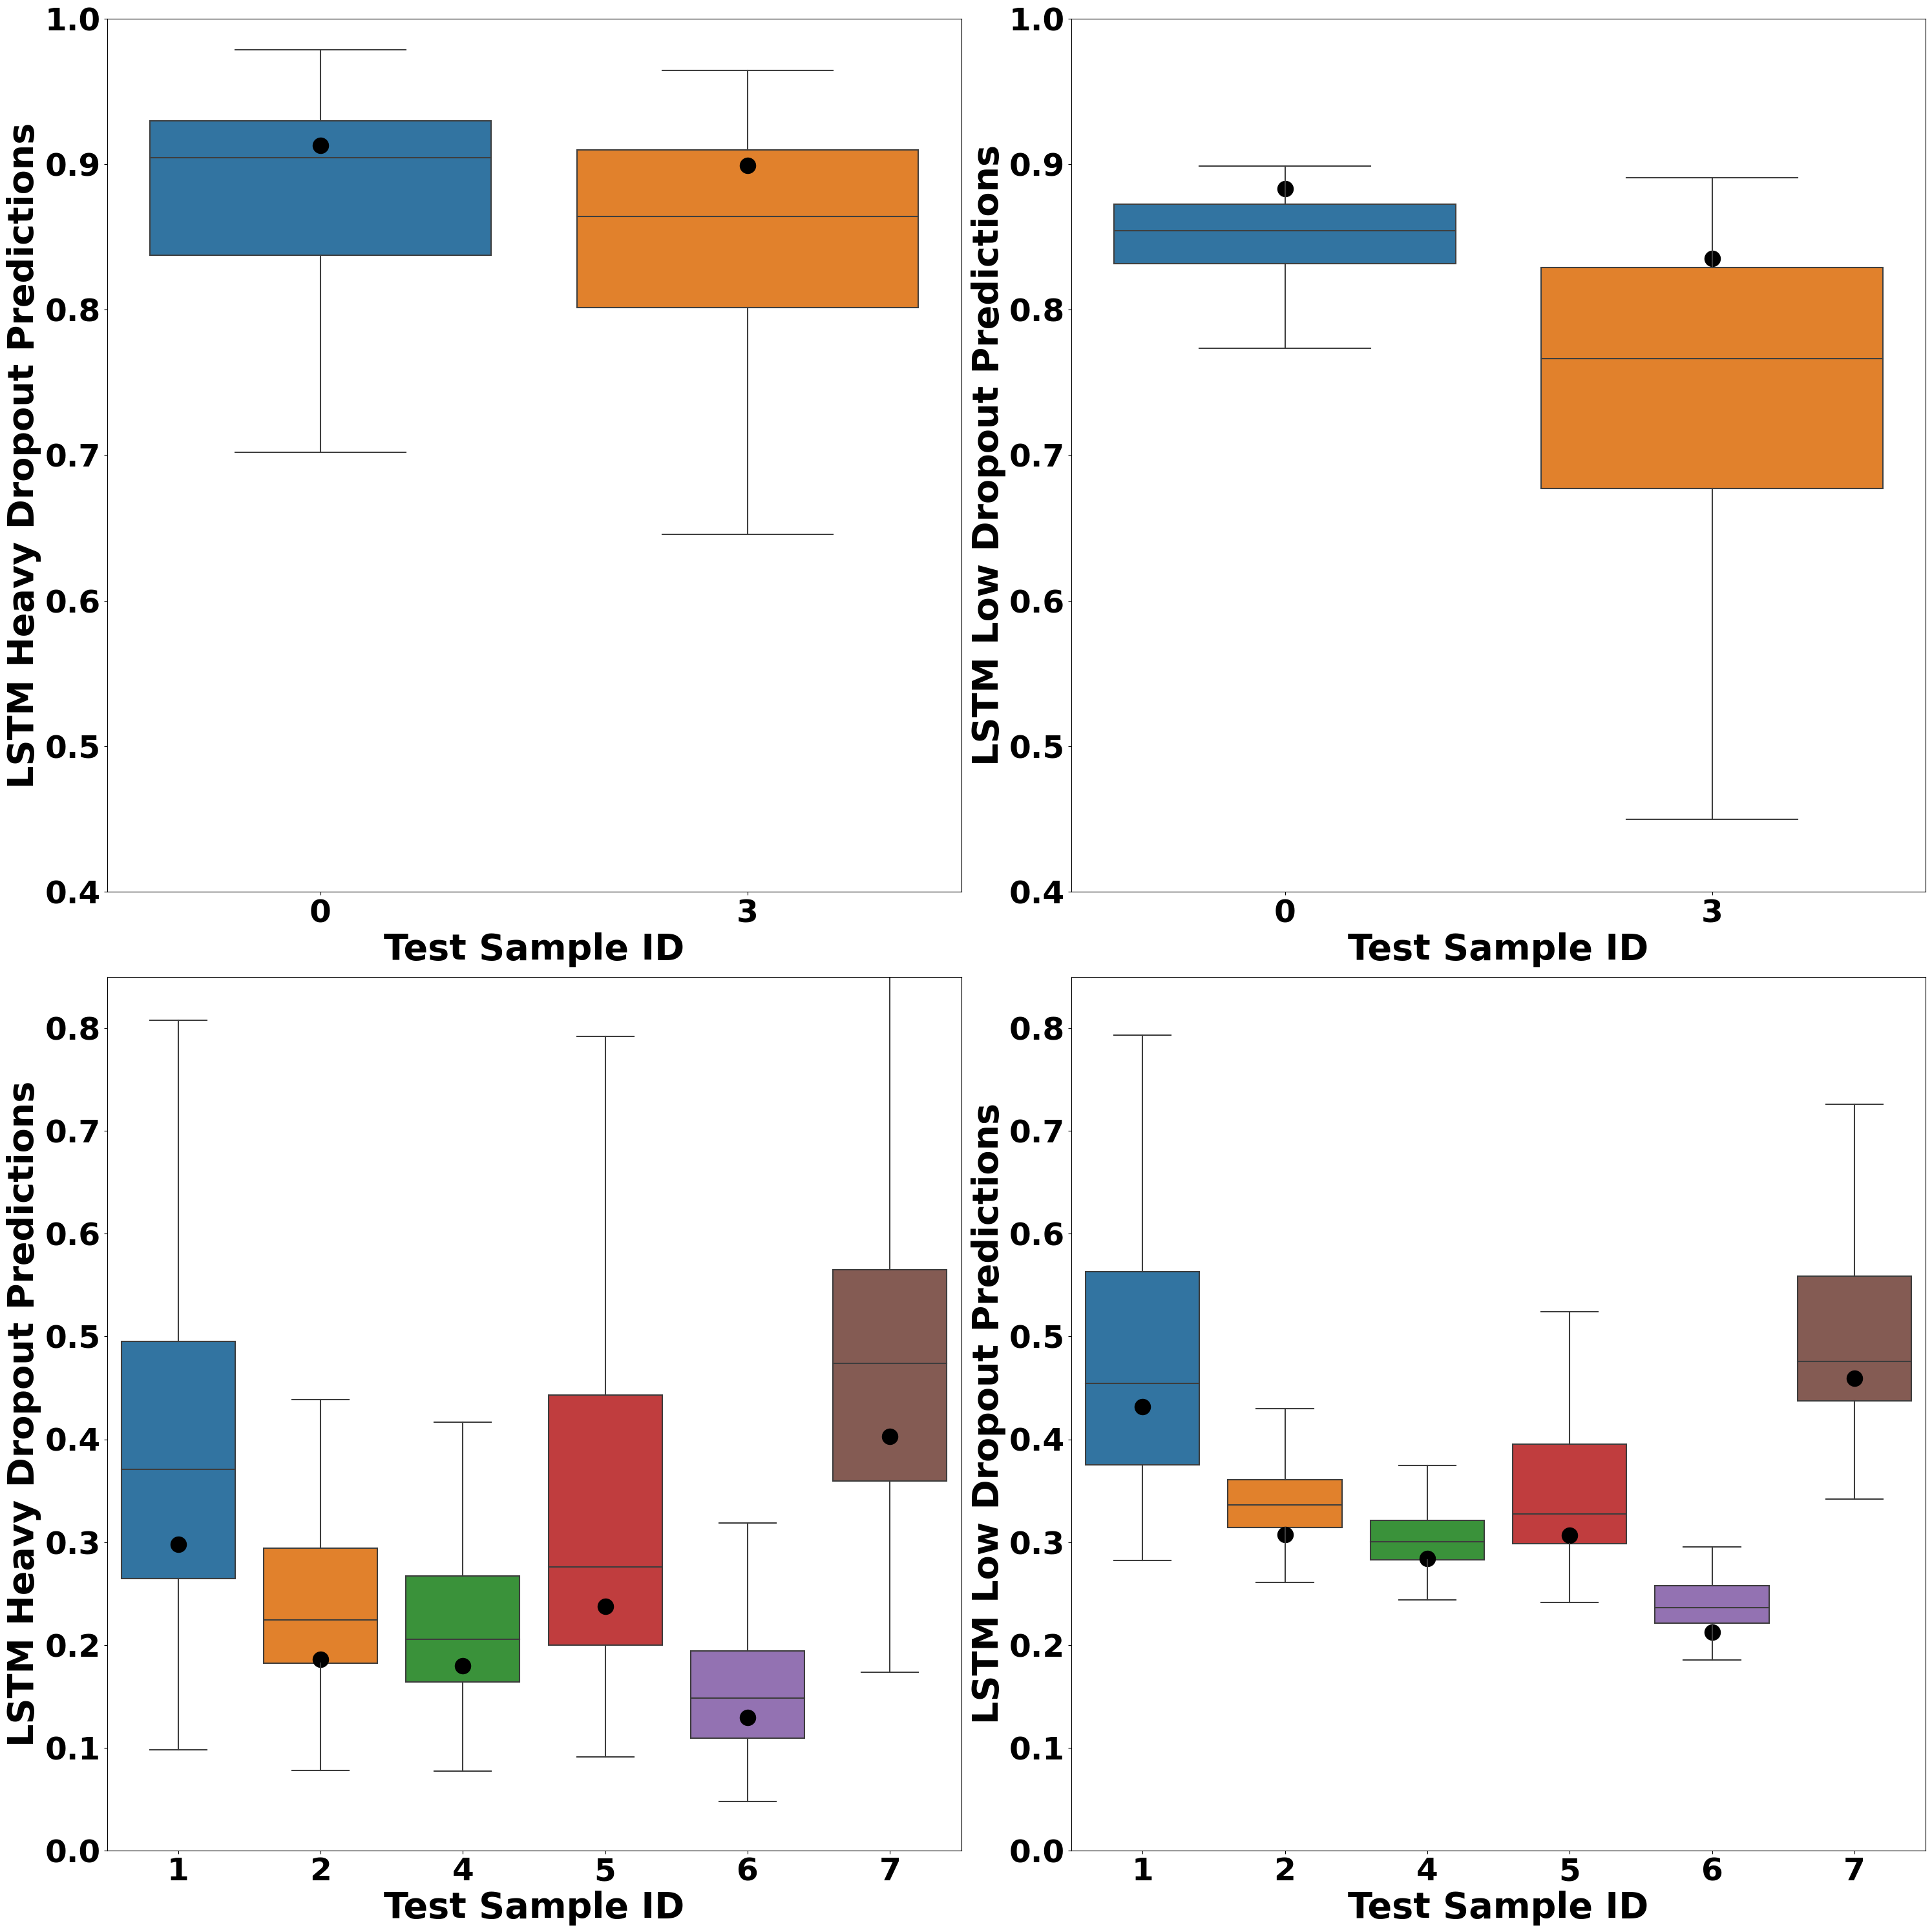

In [114]:
f